In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Height-Weight Data.csv')

In [3]:
df.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [4]:
df.Height.head(10)

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
5    67.253016
6    68.785081
7    68.348516
8    67.018950
9    63.456494
Name: Height, dtype: float64

In [5]:
df.Weight.head(10)

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
5    152.212156
6    183.927889
7    167.971111
8    175.929440
9    156.399676
Name: Weight, dtype: float64

In [6]:
df.shape

(3501, 2)

In [7]:
row,col = df.shape

In [8]:
row

3501

In [9]:
col

2

# visualization

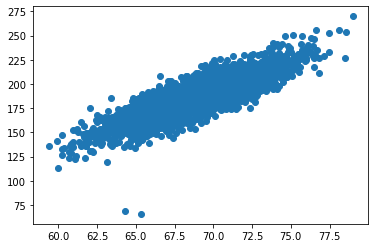

In [10]:
plt.scatter(df['Height'], df['Weight'])


Text(0, 0.5, 'Weight')

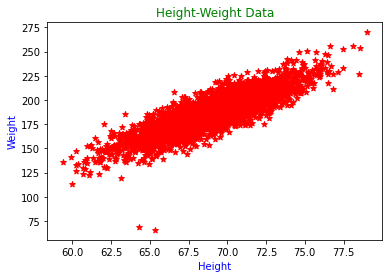

In [11]:
plt.scatter(df['Height'], df['Weight'],color = 'red',marker = '*')
plt.title('Height-Weight Data',color = 'green')
plt.xlabel('Height',color = 'blue')
plt.ylabel('Weight',color = 'blue')

In [12]:
df.Height.mean()

69.02441087268797

In [13]:
df.Weight.mean()

186.89125797946284

In [14]:
x = df[['Height']]
y = df['Weight']

# Split the dataset

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .30) #traing data 70%

In [17]:
xtrain

,Height
1363,66.934650
335,66.750654
1337,72.673994
2433,69.374161
1442,60.820271
...,...
1959,73.491205
2962,67.837608
1886,70.184877
74,72.508120


In [18]:
xtest

,Height
2448,74.242293
328,65.930896
2281,64.360136
2705,67.789381
2115,70.094117
...,...
1713,69.265140
3247,73.798936
666,64.939115
2685,65.678390


In [19]:
ytrain

1363    175.040665
335     179.542017
1337    206.980218
2433    183.936860
1442    137.775310
           ...    
1959    218.673756
2962    185.733802
1886    189.915872
74      216.218230
1030    232.250643
Name: Weight, Length: 2450, dtype: float64

In [20]:
ytest

2448    232.232647
328     163.008432
2281    175.085126
2705    186.119037
2115    167.301409
           ...    
1713    172.300390
3247    211.764141
666     163.880199
2685    163.142052
1441    197.474828
Name: Weight, Length: 1051, dtype: float64

# Model creation

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg = LinearRegression() #obj

In [23]:
reg.fit(xtrain,ytrain) # traing ml model

LinearRegression()

In [24]:
reg.score(xtest,ytest)

0.7299556758001633

In [25]:
m = reg.coef_

In [26]:
m

array([5.98765078])

In [27]:
c = reg.intercept_

In [28]:
c

-226.34435057705733

In [29]:
x1 = 73.847017
y = (m*x1)+c

In [30]:
y

array([215.82579808])

In [31]:
reg.predict([[2000]])

C:\Users\Ariyan Khan Monir\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11748.95720162])

In [32]:
df['predicted results']= reg.predict(x)

In [33]:
df

,Height,Weight,predicted results
0,73.847017,241.893563,215.825798
1,68.781904,162.310473,185.497671
2,74.110105,212.740856,217.401079
3,71.730978,220.042470,203.155698
4,69.881796,206.349801,192.083439
...,...,...,...
3496,69.296830,185.649086,188.580867
3497,70.542201,210.198845,196.037717
3498,73.912549,202.429960,216.218182
3499,67.396021,144.277671,177.199486


In [34]:
pred = reg.predict(xtest)

In [35]:
pred # corr. result of ytest / y

array([218.19257356, 168.42683128, 159.02166506, ..., 162.48839427,
       166.9149127 , 217.9945189 ])

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mse = mean_squared_error(ytest,pred)

In [38]:
mse

103.5827587406085

In [39]:
from sklearn.metrics import mean_absolute_error

In [40]:
mae = mean_absolute_error(ytest,pred)

In [41]:
mae

8.094879893041332

In [42]:
reg.predict(xtest)

array([218.19257356, 168.42683128, 159.02166506, ..., 162.48839427,
       166.9149127 , 217.9945189 ])

# Best fit line

InvalidIndexError: (slice(None, None, None), None)

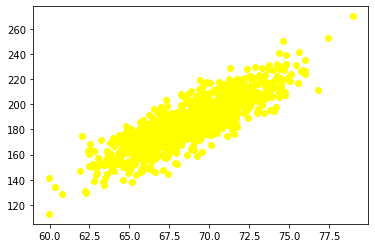

In [43]:
plt.scatter(xtest, ytest,color = 'yellow')
plt.plot(xtest,reg.predict(xtest), color = 'black')
